In [73]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib as plt

In [82]:
#Let's start by importing the time series data that we will use to generate the model.
Brent = yf.download("BZ=F", start='2015-01-01', end=None)["Adj Close"]
data = pd.DataFrame(Brent)
data = data.rename(columns={"Adj Close": "price"})
print(data)

[*********************100%***********************]  1 of 1 completed
                price
Date                 
2015-01-02  56.419998
2015-01-05  53.110001
2015-01-06  51.099998
2015-01-07  51.150002
2015-01-08  50.959999
...               ...
2023-06-29  74.339996
2023-06-30  74.900002
2023-07-03  74.650002
2023-07-05  76.650002
2023-07-06  76.349998

[2137 rows x 1 columns]


In [75]:
#We obtain the basic descriptive statistics of our series to start understanding it.
data.describe()

,price
count,2137.000000
mean,63.852227
std,18.700330
min,19.330000
25%,49.919998
50%,62.419998
75%,74.739998
max,127.980003


<Axes: xlabel='Date'>

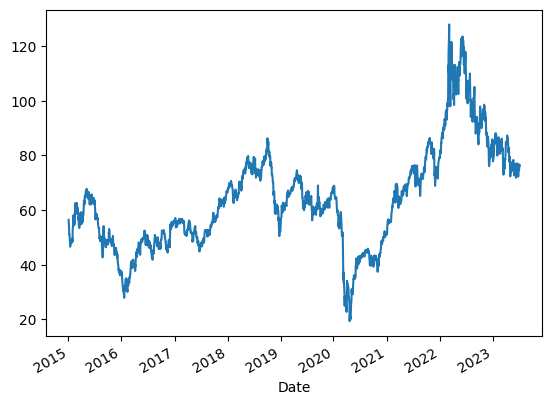

In [76]:
#We plot the series to get an impression regarding its stationarity. It appears to be non-stationary.
data['price'].plot()

In [77]:
#We will be working with a significance level of 0.05. We conducted the augmented Dickey-Fuller test to confirm 
#whether our series is stationary. If we reject the null hypothesis, it indicates stationarity; otherwise,
#it suggests non-stationarity. We obtained a p-value of 0.388, and since we do not reject H0
#we conclude that the series is non-stationary. This can be fixed by differencing the series.
from statsmodels.tsa.stattools import adfuller
testADF1 = adfuller(data['price'])
print(testADF1[1])

0.3913292225121885


In [78]:
#We differenced our series and performed the ADF test again. 
#This time, we obtained a p-value close to zero, indicating that our series is now stationary after differencing.
#Therefore, the order of integration of our series is 1.
diff1 = data['price'].diff().dropna()
ADF2 = adfuller(diff1)
print(ADF2[1])

0.0


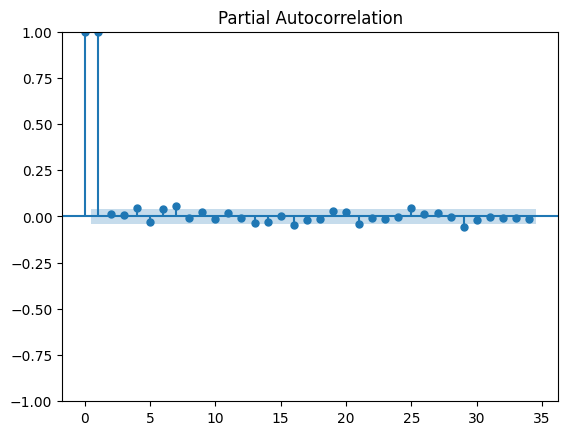

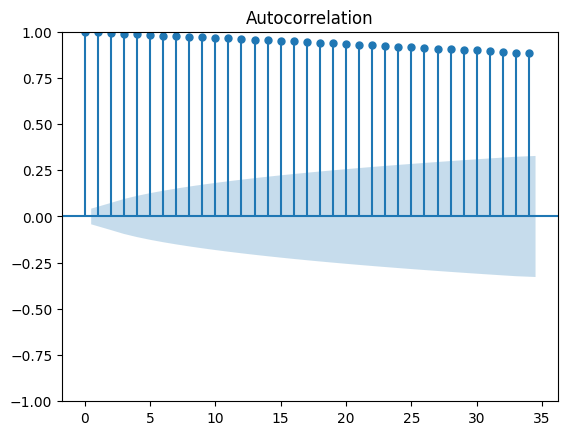

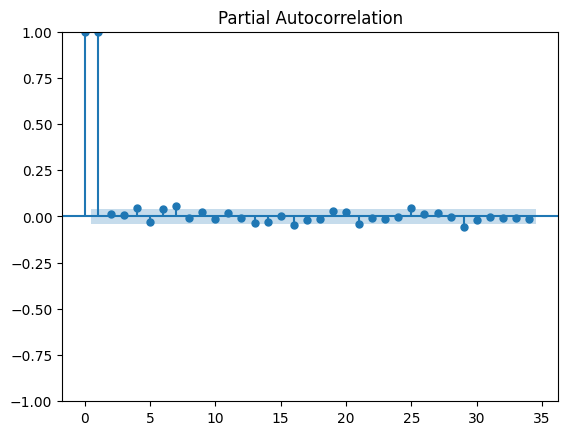

In [79]:
#We get the autocorrelation and partial autocorrelation plots to gain insights into the order of the model.
#At first glance, it appears to be an ARIMA(1, 1, 0) model.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(data['price'])
plot_pacf(data['price'])

In [80]:
#We generate our model and obtain the most relevant information from it.
from statsmodels.tsa.arima.model import ARIMA
model_110 = ARIMA(data['price'], order = (1,1,0))
model_fit_110 = model_110.fit()
print(model_fit_110.summary())
#There are 2 issues: Firstly, the AR (Auto-regressive) coefficient 1 
#failed to reject the null hypothesis in the individual significance test.
#This indicates this coefficient is not relevant in the model. On the other hand, we have rejected the null 
#hypothesis in the Ljung-Box test, which means our model is misspecified.

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2137
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4093.191
Date:                Thu, 06 Jul 2023   AIC                           8190.382
Time:                        01:20:20   BIC                           8201.716
Sample:                             0   HQIC                          8194.530
                               - 2137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0189      0.014     -1.308      0.191      -0.047       0.009
sigma2         2.7039      0.033     81.538      0.000       2.639       2.769
Ljung-Box (L1) (Q):                   0.00   Jarque-

/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [83]:
#Let's try adding a ma(1) component to the model
model_111 = ARIMA(data['price'], order = (1,1,1))
model_fit_111 = model_111.fit()
print(model_fit_111.summary())
#This time, all the coefficients are significant, and we do not reject the null hypothesis,
#indicating that the ARIMA(1,1,1) specification is useful and a much better fit.

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2137
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4091.184
Date:                Thu, 06 Jul 2023   AIC                           8188.367
Time:                        01:23:10   BIC                           8205.367
Sample:                             0   HQIC                          8194.588
                               - 2137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7756      0.118      6.582      0.000       0.545       1.007
ma.L1         -0.8056      0.110     -7.292      0.000      -1.022      -0.589
sigma2         2.6988      0.035     77.202      0.0

/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: No

/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maximilianolineiro/.pyenv/versions/3.11.0/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No su

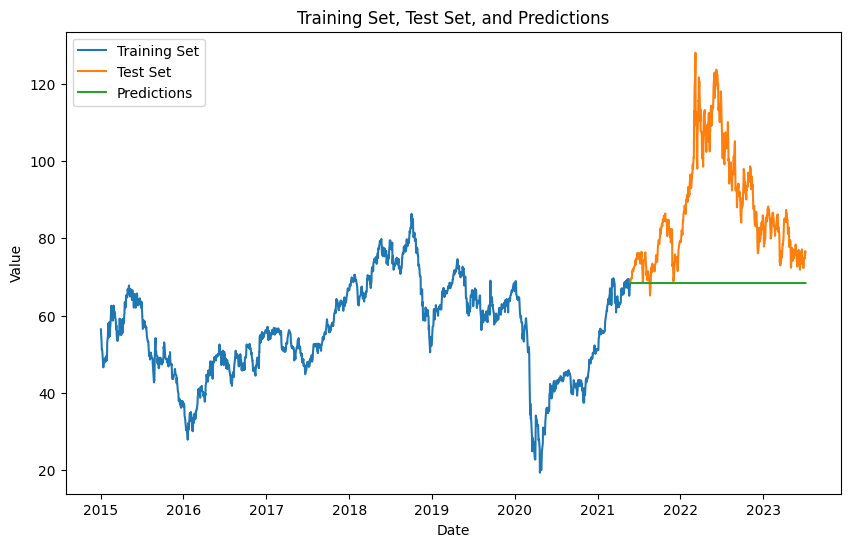

In [96]:
#Now let's split our dataset to se how accurate our model is. First we plot the predicted vs the actual.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25, shuffle=False)
import matplotlib.pyplot as plt
model = ARIMA(train, order = (1,1,1))
fitted = model.fit()
predicted = fitted.predict(start=len(train), end=len(train) + len(test) - 1)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(train.index, train, label='Training Set')
ax.plot(test.index, test, label='Test Set')
ax.plot(test.index, predicted, label='Predictions')  # Utiliza test.index para las predicciones
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Training Set, Test Set, and Predictions')
ax.legend()

plt.show()

In [104]:
#Then we'll get some metrics, specifically the Mean Absolute Error (MAE), the Root Mean Squared Error (RMSE) and Theil's U
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test, predicted)
mae = mean_absolute_error(test, predicted)
rmse = np.sqrt(mse)
theil_u = (rmse/(np.sqrt(np.sum(test**2)/len(test))+np.sqrt(np.sum(predicted**2)/len(predicted))))
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Theil's U:", theil_u)
#The closer the theil's u is to 0, the better the model is. In this case we got a value lower than 0.2 which is kinda good.

Root Mean Squared Error (RMSE): 23.80505370010996
Mean Absolute Error (MAE): 19.34432308918206
Theil's U: price    0.151405
dtype: float64


0
